## <font color=blue> Problem Statement: </font>
        Address the detection of malicious URLs as a multi-class classification problem. With this project, we classify the raw URLs into different class types such as benign or safe URLs, phishing URLs, malware URLs, or defacement URLs. Overall, the goal of this project is to develop an accurate and robust system for detecting malicious URLs. By using machine learning algorithms and carefully selected features, it is possible to achieve high levels of accuracy and effectively protect users from potential security threats.

Phishing is a type of fraud in which an attacker impersonates a reputable company or person in order to get sensitive information such as login credentials or account information via email or other communication channels. Phishing is popular among attackers because it is easier to persuade someone to click a malicious link that appears to be authentic than it is to break through a computer's protection measures.


# **Context**
Malicious URLs or malicious website is a very serious threat to cybersecurity. Malicious URLs host unsolicited content (spam, phishing, drive-by downloads, etc.) and lure unsuspecting users to become victims of scams (monetary loss, theft of private information, and malware installation), and cause losses of billions of dollars every year. We have collected this dataset to include a large number of examples of Malicious URLs so that a machine learning-based model can be developed to identify malicious urls so that we can stop them in advance before infecting computer system or spreading through inteinternet.

# **Content**
we have collected a huge dataset of 651,191 URLs, out of which 428103 benign or safe URLs, 96457 defacement URLs, 94111 phishing URLs, and 32520 malware URLs. Figure 2 depicts their distribution in terms of percentage. As we know one of the most crucial tasks is to curate the dataset for a machine learning project. We have curated this dataset from five different sources.

For collecting benign, phishing, malware and defacement URLs we have used [URL dataset (ISCX-URL-2016)](https://www.unb.ca/cic/datasets/url-2016.html) For increasing phishing and malware URLs, we have used [Malware domain black list dataset](http://www.malwaredomains.com/wordpress/?page_id=66). We have increased benign URLs using [faizan git repo](https://github.com/faizann24/Using-machine-learning-to-detect-malicious-URLs/tree/master/data) At last, we have increased more number of phishing URLs using [Phishtank dataset](https://www.phishtank.com/developer_info.php) and [PhishStorm dataset](https://research.aalto.fi/en/datasets/phishstorm--phishing--legitimate-url-dataset(f49465b2-c68a-4182-9171-075f0ed797d5).html) As we have told you that dataset is collected from different sources. So firstly, we have collected the URLs from different sources into a separate data frame and finally merge them to retain only URLs and their class type.

A URL consists of the top-level domain, hostname, paths, and port of the web
address, as in the following diagram:

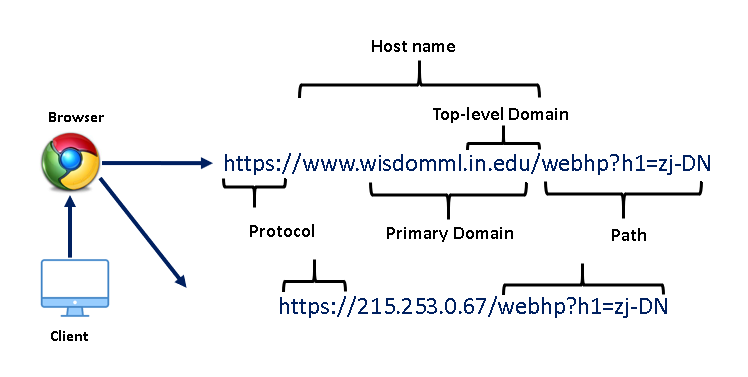

# Quick Links

1. [Libraries](#section-1)
2. [Preprocessing](#section-2)
3. [Feature Engineering](#section-3)
4. [EDA](#4)
5. [Target Encoding](#section-5)
6. [Creation of Dataframe (Features and Target)](#section-6)
7. [Scaling of Data](#section-7)
8. [Analysis after scaling Data](#section-8)
9. [Correlation and heatmap](#section-9)
10. [p_value and variance inflation factor](#section-10)
11. [Train Test Split](#section-11)
12. [Data Balancing](#section-12)
13. [Model Building & Hyperparameter tuning](#section-13)
14. [ANN Model](#section-14)
15. [Creating Best Model](#section-15)
16. [Saving Model Using pickel & joblib](#section-16)
17. [confusion_matrix](#section-17)
18. [ROC Curve](#section-18)
19. [Classification Report](#section-19)
20. [Prediction](#section-20)

# **<a id="section-1"></a><font color='3D87A6'> Libraries </font>**

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import itertools
from sklearn.model_selection import train_test_split
import xgboost as xgb
from lightgbm import LGBMClassifier
import os
from wordcloud import WordCloud
pd.set_option("display.max_columns",None)
pd.set_option("max_colwidth",None)
pd.set_option("display.max_rows",None)
filterwarnings("ignore")

# **<a id="section-2"></a><font color='3D87A6'> Preprocessing </font>**

In [14]:
data = pd.read_csv("malicious_phish.csv")
df = data.copy()
#df = data[:500]
df.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=com_content&view=article&id=70&vsig70_0=15,defacement
4,http://adventure-nicaragua.net/index.php?option=com_mailto&tmpl=component&link=aHR0cDovL2FkdmVudHVyZS1uaWNhcmFndWEubmV0L2luZGV4LnBocD9vcHRpb249Y29tX2NvbnRlbnQmdmlldz1hcnRpY2xlJmlkPTQ3OmFib3V0JmNhdGlkPTM2OmRlbW8tYXJ0aWNsZXMmSXRlbWlkPTU0,defacement


In [15]:
df.shape

(651191, 2)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651191 entries, 0 to 651190
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     651191 non-null  object
 1   type    651191 non-null  object
dtypes: object(2)
memory usage: 9.9+ MB


In [17]:
df.describe()

,url,type
count,651191,651191
unique,641119,4
top,http://style.org.hc360.com/css/detail/mysite/siteconfig/pro_control.css,benign
freq,180,428103


In [18]:
df.dtypes

url     object
type    object
dtype: object

## checking null values from our dataset

In [7]:
df.isna().sum().sum()

0

### There is no null value present in our data

In [8]:
df.type.value_counts()

benign        428103
defacement     96457
phishing       94111
malware        32520
Name: type, dtype: int64

In [9]:
df_phish = df[df.type=='phishing']
df_malware = df[df.type=='malware']
df_deface = df[df.type=='defacement']
df_benign = df[df.type=='benign']

In [10]:
df.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=com_content&view=article&id=70&vsig70_0=15,defacement
4,http://adventure-nicaragua.net/index.php?option=com_mailto&tmpl=component&link=aHR0cDovL2FkdmVudHVyZS1uaWNhcmFndWEubmV0L2luZGV4LnBocD9vcHRpb249Y29tX2NvbnRlbnQmdmlldz1hcnRpY2xlJmlkPTQ3OmFib3V0JmNhdGlkPTM2OmRlbW8tYXJ0aWNsZXMmSXRlbWlkPTU0,defacement


### Phishing URL

**Phishing** is a type of social engineering attack often used to steal user data, including login credentials and credit card numbers. It occurs when an attacker, masquerading as a trusted entity, dupes a victim into opening an email, instant message, or text message

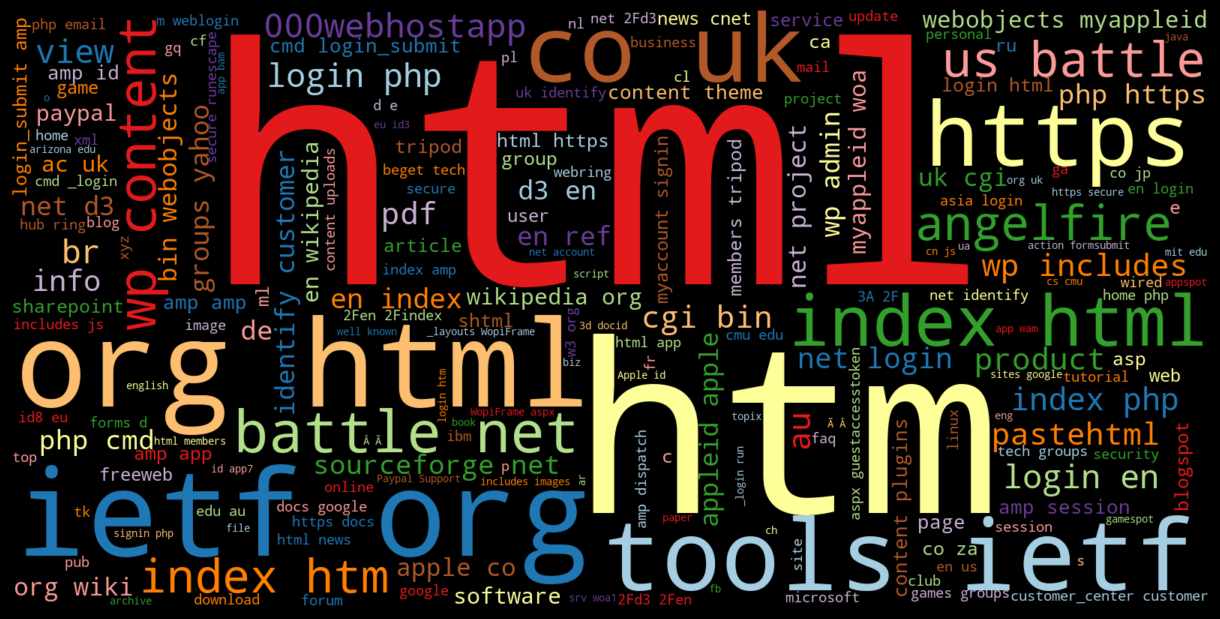

In [11]:
phish_url = " ".join(i for i in df_phish.url)
wordcloud = WordCloud(width=1600, height=800,colormap='Paired').generate(phish_url)
plt.figure( figsize=(12,14),facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### Malware URL

**Malware** (short for “malicious software”) is a file or code, typically delivered over a network, that infects, explores, steals or conducts virtually any behavior an attacker wants. And because malware comes in so many variants, there are numerous methods to infect computer systems.

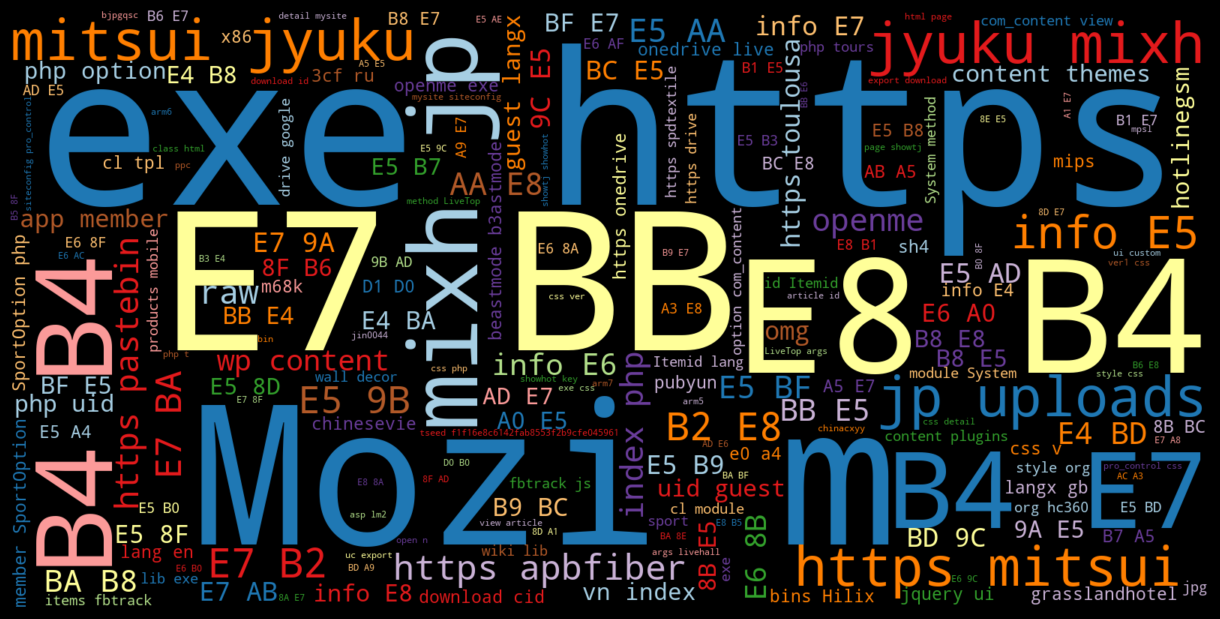

In [12]:
malware_url = " ".join(i for i in df_malware.url)
wordcloud = WordCloud(width=1600, height=800,colormap='Paired').generate(malware_url)
plt.figure( figsize=(12,14),facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### Defacement URL

Website **defacements** are the unauthorized modification of web pages, including the addition, removal, or alteration of existing content. These attacks are commonly carried out by hacktivists, who compromise a website or web server and replace or alter the hosted website information with their own messages.

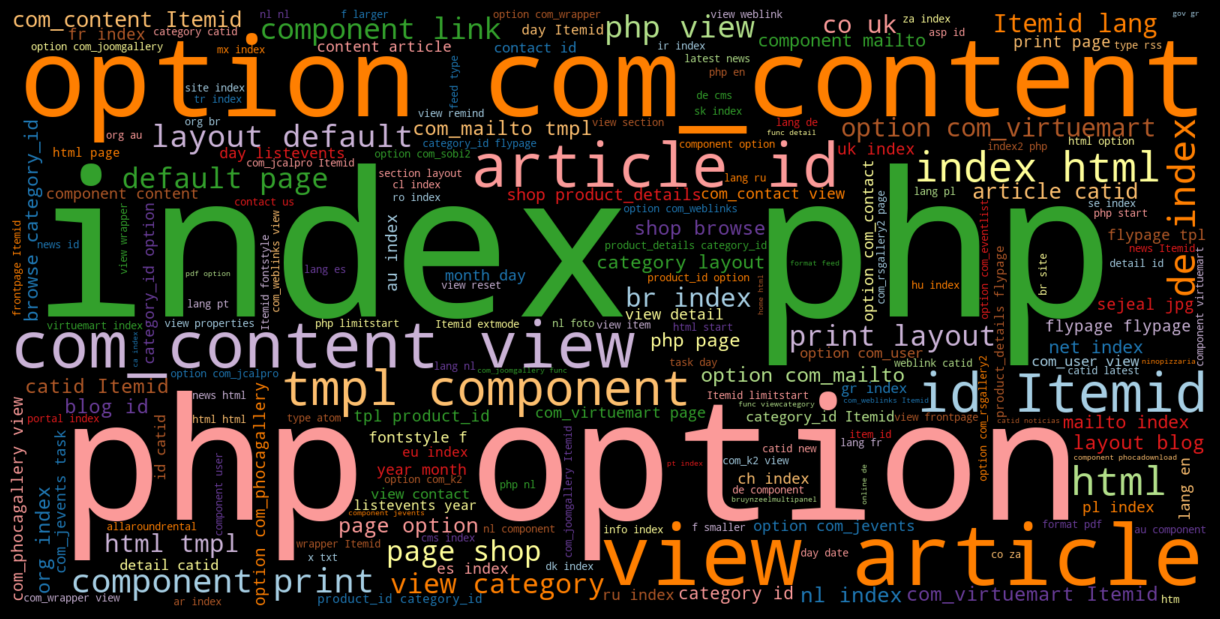

In [13]:
deface_url = " ".join(i for i in df_deface.url)
wordcloud = WordCloud(width=1600, height=800,colormap='Paired').generate(deface_url)
plt.figure( figsize=(12,14),facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### Benign URL

A benign website or URL refers to a website or URL that is considered safe, trustworthy, and does not pose any harm to the user's device or data. Typically, a benign website or URL is not associated with any malicious or harmful activities, such as malware infections, phishing scams, or cyber attacks.

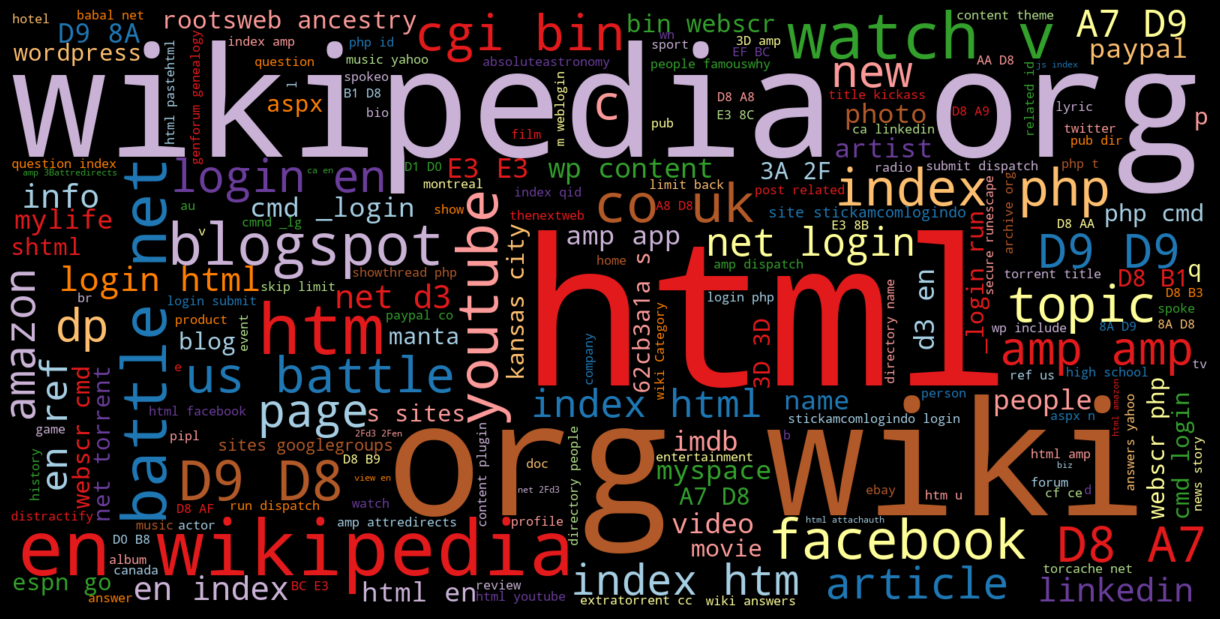

In [14]:
benign_url = " ".join(i for i in df_benign.url)
wordcloud = WordCloud(width=1600, height=800,colormap='Paired').generate(benign_url)
plt.figure( figsize=(12,14),facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [15]:
count = df.type.value_counts()
count

benign        428103
defacement     96457
phishing       94111
malware        32520
Name: type, dtype: int64

In [16]:
x=count.index
x

Index(['benign', 'defacement', 'phishing', 'malware'], dtype='object')

Text(0, 0.5, 'Count')

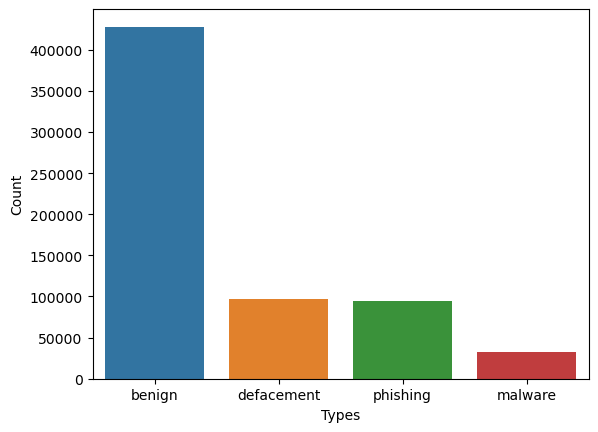

In [17]:
sns.barplot(x=count.index, y=count)
plt.xlabel('Types')
plt.ylabel('Count')

<h4>first have to omit the (www.) from the URL which is in fact a sub domain in itself.</h4>

# **<a id="section-3"></a><font color='3D87A6'> Feature Engineering</font>**

In [19]:
import re
#Use of IP or not in domain
def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0
df['use_of_ip'] = df['url'].apply(lambda i: having_ip_address(i))

In [20]:
from urllib.parse import urlparse

def abnormal_url(url):
    hostname = urlparse(url).hostname
    hostname = str(hostname)
    match = re.search(hostname, url)
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0


df['abnormal_url'] = df['url'].apply(lambda i: abnormal_url(i))

In [21]:
from googlesearch import search

In [22]:
def google_index(url):
    site = search(url, 5)
    return 1 if site else 0
df['google_index'] = df['url'].apply(lambda i: google_index(i))

In [23]:
def count_dot(url):
    count_dot = url.count('.')
    return count_dot

df['count.'] = df['url'].apply(lambda i: count_dot(i))
df.head()

,url,type,use_of_ip,abnormal_url,google_index,count.
0,br-icloud.com.br,phishing,0,0,1,2
1,mp3raid.com/music/krizz_kaliko.html,benign,0,0,1,2
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,0,1,2
3,http://www.garage-pirenne.be/index.php?option=com_content&view=article&id=70&vsig70_0=15,defacement,0,1,1,3
4,http://adventure-nicaragua.net/index.php?option=com_mailto&tmpl=component&link=aHR0cDovL2FkdmVudHVyZS1uaWNhcmFndWEubmV0L2luZGV4LnBocD9vcHRpb249Y29tX2NvbnRlbnQmdmlldz1hcnRpY2xlJmlkPTQ3OmFib3V0JmNhdGlkPTM2OmRlbW8tYXJ0aWNsZXMmSXRlbWlkPTU0,defacement,0,1,1,2


In [24]:
def count_www(url):
    url.count('www')
    return url.count('www')

df['count-www'] = df['url'].apply(lambda i: count_www(i))

In [25]:
def count_atrate(url):
     
    return url.count('@')

df['count@'] = df['url'].apply(lambda i: count_atrate(i))

In [26]:
def no_of_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')
df['count_dir'] = df['url'].apply(lambda i: no_of_dir(i))

In [27]:
def no_of_embed(url):
    urldir = urlparse(url).path
    return urldir.count('//')

df['count_embed_domian'] = df['url'].apply(lambda i: no_of_embed(i))

In [28]:
def shortening_service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return 0
    
    
df['short_url'] = df['url'].apply(lambda i: shortening_service(i))

In [29]:
def count_https(url):
    return url.count('https')

df['count-https'] = df['url'].apply(lambda i : count_https(i))

In [30]:
def count_http(url):
    return url.count('http')

df['count-http'] = df['url'].apply(lambda i : count_http(i))

In [31]:
def count_per(url):
    return url.count('%')

df['count%'] = df['url'].apply(lambda i : count_per(i))

In [32]:
def count_ques(url):
    return url.count('?')

df['count?'] = df['url'].apply(lambda i: count_ques(i))

In [33]:
def count_hyphen(url):
    return url.count('-')

df['count-'] = df['url'].apply(lambda i: count_hyphen(i))

In [34]:
def count_equal(url):
    return url.count('=')

df['count='] = df['url'].apply(lambda i: count_equal(i))

In [35]:
def url_length(url):
    return len(str(url))


#Length of URL
df['url_length'] = df['url'].apply(lambda i: url_length(i))

In [36]:
#Hostname Length
def hostname_length(url):
    return len(urlparse(url).netloc)

df['hostname_length'] = df['url'].apply(lambda i: hostname_length(i))

df.head()

,url,type,use_of_ip,abnormal_url,google_index,count.,count-www,count@,count_dir,count_embed_domian,short_url,count-https,count-http,count%,count?,count-,count=,url_length,hostname_length
0,br-icloud.com.br,phishing,0,0,1,2,0,0,0,0,0,0,0,0,0,1,0,16,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,0,1,2,0,0,2,0,0,0,0,0,0,0,0,35,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,0,1,2,0,0,3,0,0,0,0,0,0,0,0,31,0
3,http://www.garage-pirenne.be/index.php?option=com_content&view=article&id=70&vsig70_0=15,defacement,0,1,1,3,1,0,1,0,0,0,1,0,1,1,4,88,21
4,http://adventure-nicaragua.net/index.php?option=com_mailto&tmpl=component&link=aHR0cDovL2FkdmVudHVyZS1uaWNhcmFndWEubmV0L2luZGV4LnBocD9vcHRpb249Y29tX2NvbnRlbnQmdmlldz1hcnRpY2xlJmlkPTQ3OmFib3V0JmNhdGlkPTM2OmRlbW8tYXJ0aWNsZXMmSXRlbWlkPTU0,defacement,0,1,1,2,0,0,1,0,0,0,1,0,1,1,3,235,23


In [37]:
def suspicious_words(url):
    match = re.search('PayPal|login|signin|bank|account|update|free|lucky|service|bonus|ebayisapi|webscr',
                      url)
    if match:
        return 1
    else:
        return 0
df['sus_url'] = df['url'].apply(lambda i: suspicious_words(i))

In [38]:
def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits


df['count-digits']= df['url'].apply(lambda i: digit_count(i))

In [39]:
def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters


df['count-letters']= df['url'].apply(lambda i: letter_count(i))

df.head()

,url,type,use_of_ip,abnormal_url,google_index,count.,count-www,count@,count_dir,count_embed_domian,short_url,count-https,count-http,count%,count?,count-,count=,url_length,hostname_length,sus_url,count-digits,count-letters
0,br-icloud.com.br,phishing,0,0,1,2,0,0,0,0,0,0,0,0,0,1,0,16,0,0,0,13
1,mp3raid.com/music/krizz_kaliko.html,benign,0,0,1,2,0,0,2,0,0,0,0,0,0,0,0,35,0,0,1,29
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,0,1,2,0,0,3,0,0,0,0,0,0,0,0,31,0,0,1,25
3,http://www.garage-pirenne.be/index.php?option=com_content&view=article&id=70&vsig70_0=15,defacement,0,1,1,3,1,0,1,0,0,0,1,0,1,1,4,88,21,0,7,63
4,http://adventure-nicaragua.net/index.php?option=com_mailto&tmpl=component&link=aHR0cDovL2FkdmVudHVyZS1uaWNhcmFndWEubmV0L2luZGV4LnBocD9vcHRpb249Y29tX2NvbnRlbnQmdmlldz1hcnRpY2xlJmlkPTQ3OmFib3V0JmNhdGlkPTM2OmRlbW8tYXJ0aWNsZXMmSXRlbWlkPTU0,defacement,0,1,1,2,0,0,1,0,0,0,1,0,1,1,3,235,23,0,22,199


In [40]:
pip install tld

Note: you may need to restart the kernel to use updated packages.


In [41]:
#Importing dependencies
from urllib.parse import urlparse
from tld import get_tld
import os.path

#First Directory Length
def fd_length(url):
    urlpath= urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0

df['fd_length'] = df['url'].apply(lambda i: fd_length(i))

#Length of Top Level Domain
df['tld'] = df['url'].apply(lambda i: get_tld(i,fail_silently=True))

In [42]:
def tld_length(tld):
    try:
        return len(tld)
    except:
        return -1

df['tld_length'] = df['tld'].apply(lambda i: tld_length(i))

In [43]:
df = df.drop("tld",1)

In [44]:
df.columns

Index(['url', 'type', 'use_of_ip', 'abnormal_url', 'google_index', 'count.',
       'count-www', 'count@', 'count_dir', 'count_embed_domian', 'short_url',
       'count-https', 'count-http', 'count%', 'count?', 'count-', 'count=',
       'url_length', 'hostname_length', 'sus_url', 'count-digits',
       'count-letters', 'fd_length', 'tld_length'],
      dtype='object')

In [45]:
df['type'].value_counts()

benign        428103
defacement     96457
phishing       94111
malware        32520
Name: type, dtype: int64

# **<a id="4"></a><font color='3D87A6'> EDA</font>**

## 1. Distribution of use_of_ip

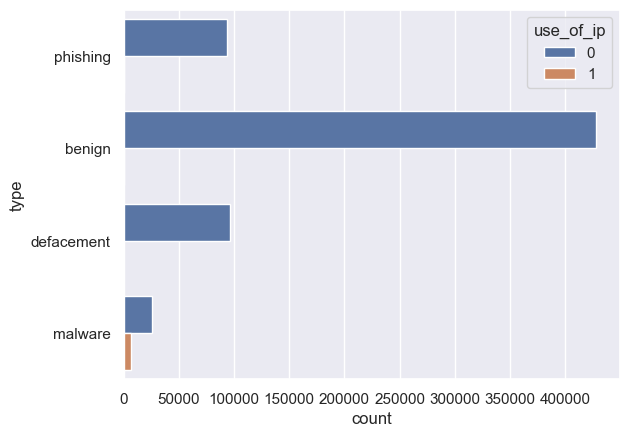

In [46]:
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(y="type", data=df,hue="use_of_ip")


## 2. Distribution of abnormal url

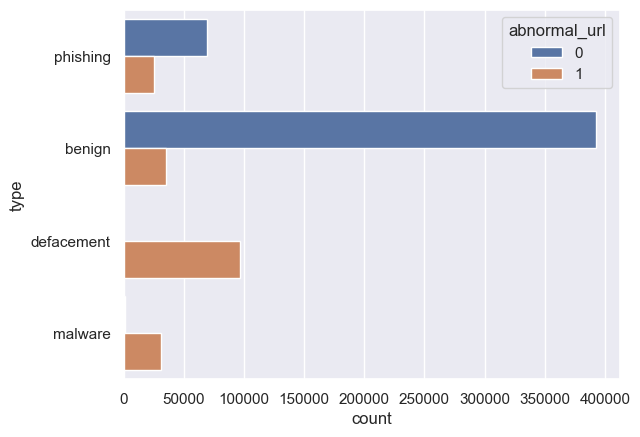

In [47]:
sns.set(style="darkgrid")
ax = sns.countplot(y="type", data=df,hue="abnormal_url")


## 3. Distribution of Google Index

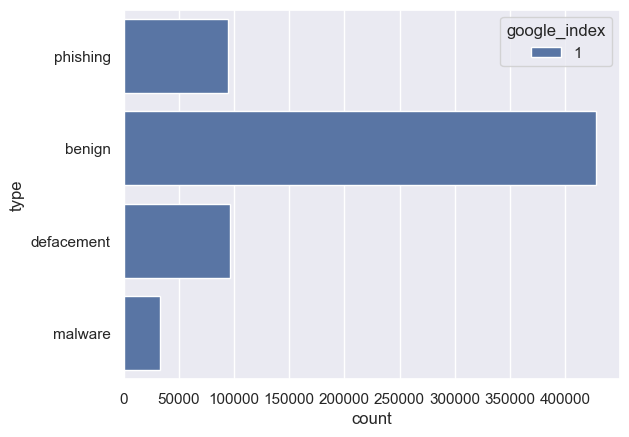

In [48]:
sns.set(style="darkgrid")
ax = sns.countplot(y="type", data=df,hue="google_index")

## 4. Distribution of Shorl URL

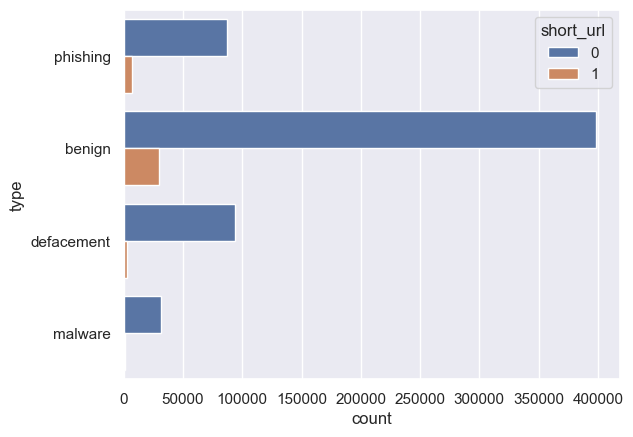

In [49]:
sns.set(style="darkgrid")
ax = sns.countplot(y="type", data=df,hue="short_url")

## 5. Distribution of Suspicious URL

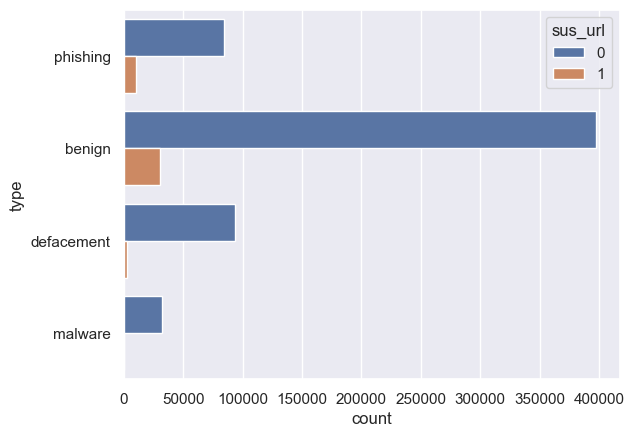

In [50]:
sns.set(style="darkgrid")
ax = sns.countplot(y="type", data=df,hue="sus_url")

## 6. Distribution of count of [.] dot

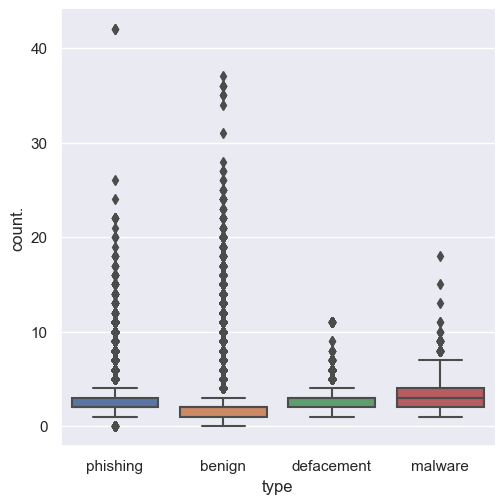

In [51]:
sns.set(style="darkgrid")
ax = sns.catplot(x="type", y="count.", kind="box", data=df)

## 7. Distribution of count-www

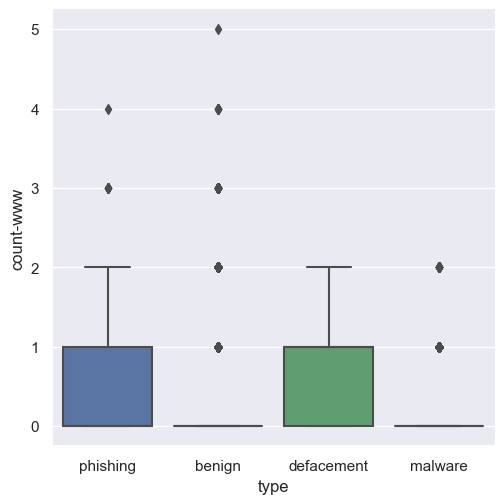

In [52]:
sns.set(style="darkgrid")
ax = sns.catplot(x="type", y="count-www", kind="box", data=df)

## 8. Distribution of count@

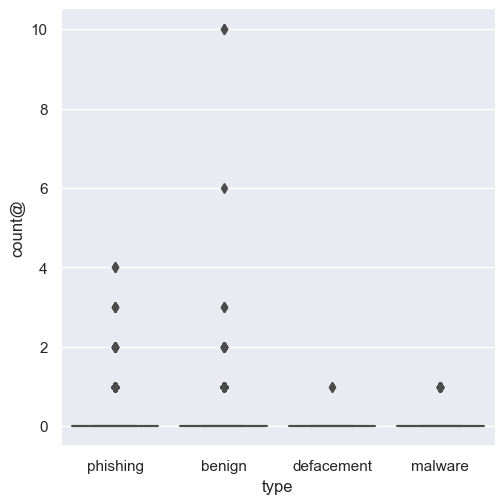

In [53]:
sns.set(style="darkgrid")
ax = sns.catplot(x="type", y="count@", kind="box", data=df)

## 9. Distribution of count_dir

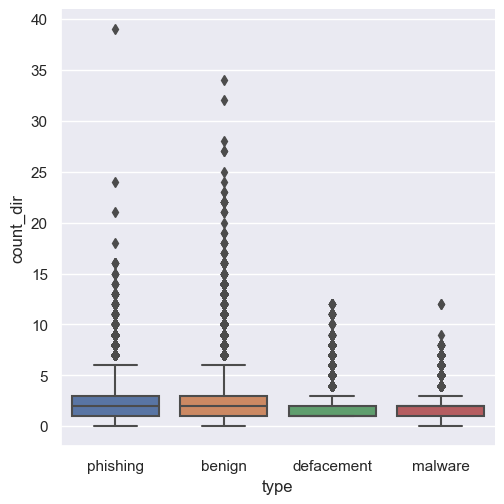

In [54]:
sns.set(style="darkgrid")
ax = sns.catplot(x="type", y="count_dir", kind="box", data=df)

## 10. Distribution of hostname length

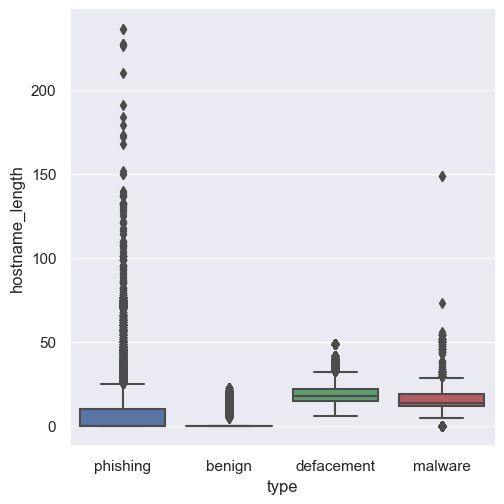

In [55]:
sns.set(style="darkgrid")
ax = sns.catplot(x="type", y="hostname_length", kind="box", data=df)

## 11. Distribution of first directory length

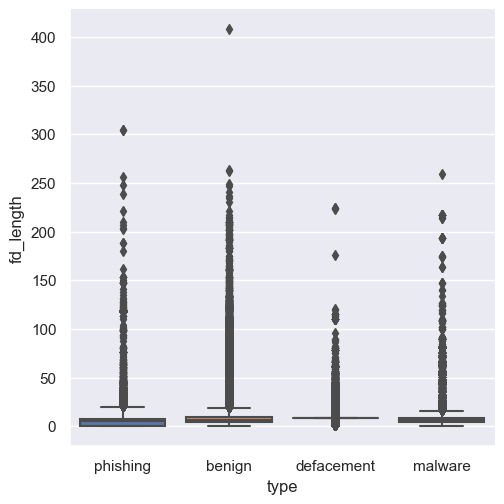

In [56]:
sns.set(style="darkgrid")
ax = sns.catplot(x="type", y="fd_length", kind="box", data=df)

## 12. Distribution of top-level domain length

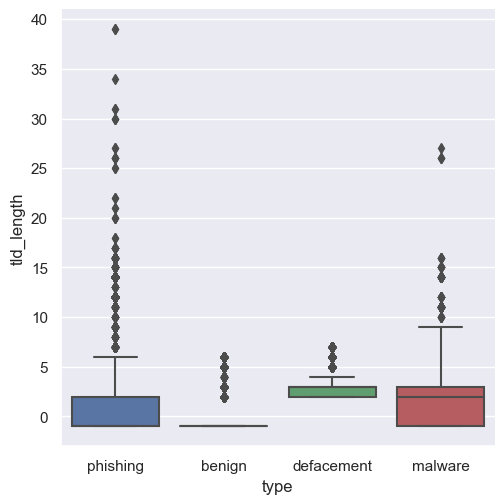

In [57]:
sns.set(style="darkgrid")
ax = sns.catplot(x="type", y="tld_length", kind="box", data=df)

# **<a id="section-5"></a><font color='3D87A6'> Target Encoding</font>**

In [58]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df["type_code"] = lb_make.fit_transform(df["type"])
df["type_code"].value_counts()



0    428103
1     96457
3     94111
2     32520
Name: type_code, dtype: int64

# **<a id="section-6"></a><font color='3D87A6'> Creation of Dataframe (Features and Target) </font>**

In [59]:
df = df[['use_of_ip','abnormal_url', 'count.', 'count-www', 'count@',
       'count_dir', 'count_embed_domian', 'short_url', 'count-https',
       'count-http', 'count%', 'count?', 'count-', 'count=', 'url_length',
       'hostname_length', 'sus_url', 'fd_length', 'tld_length', 'count-digits',
       'count-letters','type_code']]

In [60]:
df.head()

,use_of_ip,abnormal_url,count.,count-www,count@,count_dir,count_embed_domian,short_url,count-https,count-http,count%,count?,count-,count=,url_length,hostname_length,sus_url,fd_length,tld_length,count-digits,count-letters,type_code
0,0,0,2,0,0,0,0,0,0,0,0,0,1,0,16,0,0,0,-1,0,13,3
1,0,0,2,0,0,2,0,0,0,0,0,0,0,0,35,0,0,5,-1,1,29,0
2,0,0,2,0,0,3,0,0,0,0,0,0,0,0,31,0,0,7,-1,1,25,0
3,0,1,3,1,0,1,0,0,0,1,0,1,1,4,88,21,0,9,2,7,63,1
4,0,1,2,0,0,1,0,0,0,1,0,1,1,3,235,23,0,9,3,22,199,1


# **<a id="section-7"></a><font color='3D87A6'> Scaling of Data </font>**

In [61]:
#Predictor Variables
# filtering out google_index as it has only 1 value
x = df.drop("type_code",axis=1)
#Target Variable
y = df['type_code']

In [62]:
from sklearn.preprocessing import MinMaxScaler

In [63]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(x)
x = pd.DataFrame(scaled_data,columns = x.columns)
x.head()

,use_of_ip,abnormal_url,count.,count-www,count@,count_dir,count_embed_domian,short_url,count-https,count-http,count%,count?,count-,count=,url_length,hostname_length,sus_url,fd_length,tld_length,count-digits,count-letters
0,0.0,0.0,0.047619,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.00,0.011494,0.000000,0.006900,0.000000,0.0,0.000000,0.000,0.000000,0.006072
1,0.0,0.0,0.047619,0.0,0.0,0.051282,0.0,0.0,0.0,0.000000,0.0,0.00,0.000000,0.000000,0.015639,0.000000,0.0,0.012255,0.000,0.000831,0.013545
2,0.0,0.0,0.047619,0.0,0.0,0.076923,0.0,0.0,0.0,0.000000,0.0,0.00,0.000000,0.000000,0.013799,0.000000,0.0,0.017157,0.000,0.000831,0.011677
3,0.0,1.0,0.071429,0.2,0.0,0.025641,0.0,0.0,0.0,0.111111,0.0,0.05,0.011494,0.078431,0.040018,0.088983,0.0,0.022059,0.075,0.005814,0.029426
4,0.0,1.0,0.047619,0.0,0.0,0.025641,0.0,0.0,0.0,0.111111,0.0,0.05,0.011494,0.058824,0.107636,0.097458,0.0,0.022059,0.100,0.018272,0.092947


In [64]:
df = pd.concat([x,y],axis=1)
df.head()

,use_of_ip,abnormal_url,count.,count-www,count@,count_dir,count_embed_domian,short_url,count-https,count-http,count%,count?,count-,count=,url_length,hostname_length,sus_url,fd_length,tld_length,count-digits,count-letters,type_code
0,0.0,0.0,0.047619,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.00,0.011494,0.000000,0.006900,0.000000,0.0,0.000000,0.000,0.000000,0.006072,3
1,0.0,0.0,0.047619,0.0,0.0,0.051282,0.0,0.0,0.0,0.000000,0.0,0.00,0.000000,0.000000,0.015639,0.000000,0.0,0.012255,0.000,0.000831,0.013545,0
2,0.0,0.0,0.047619,0.0,0.0,0.076923,0.0,0.0,0.0,0.000000,0.0,0.00,0.000000,0.000000,0.013799,0.000000,0.0,0.017157,0.000,0.000831,0.011677,0
3,0.0,1.0,0.071429,0.2,0.0,0.025641,0.0,0.0,0.0,0.111111,0.0,0.05,0.011494,0.078431,0.040018,0.088983,0.0,0.022059,0.075,0.005814,0.029426,1
4,0.0,1.0,0.047619,0.0,0.0,0.025641,0.0,0.0,0.0,0.111111,0.0,0.05,0.011494,0.058824,0.107636,0.097458,0.0,0.022059,0.100,0.018272,0.092947,1


# **<a id="section-8"></a><font color='3D87A6'> Analysis after scaling </font>**

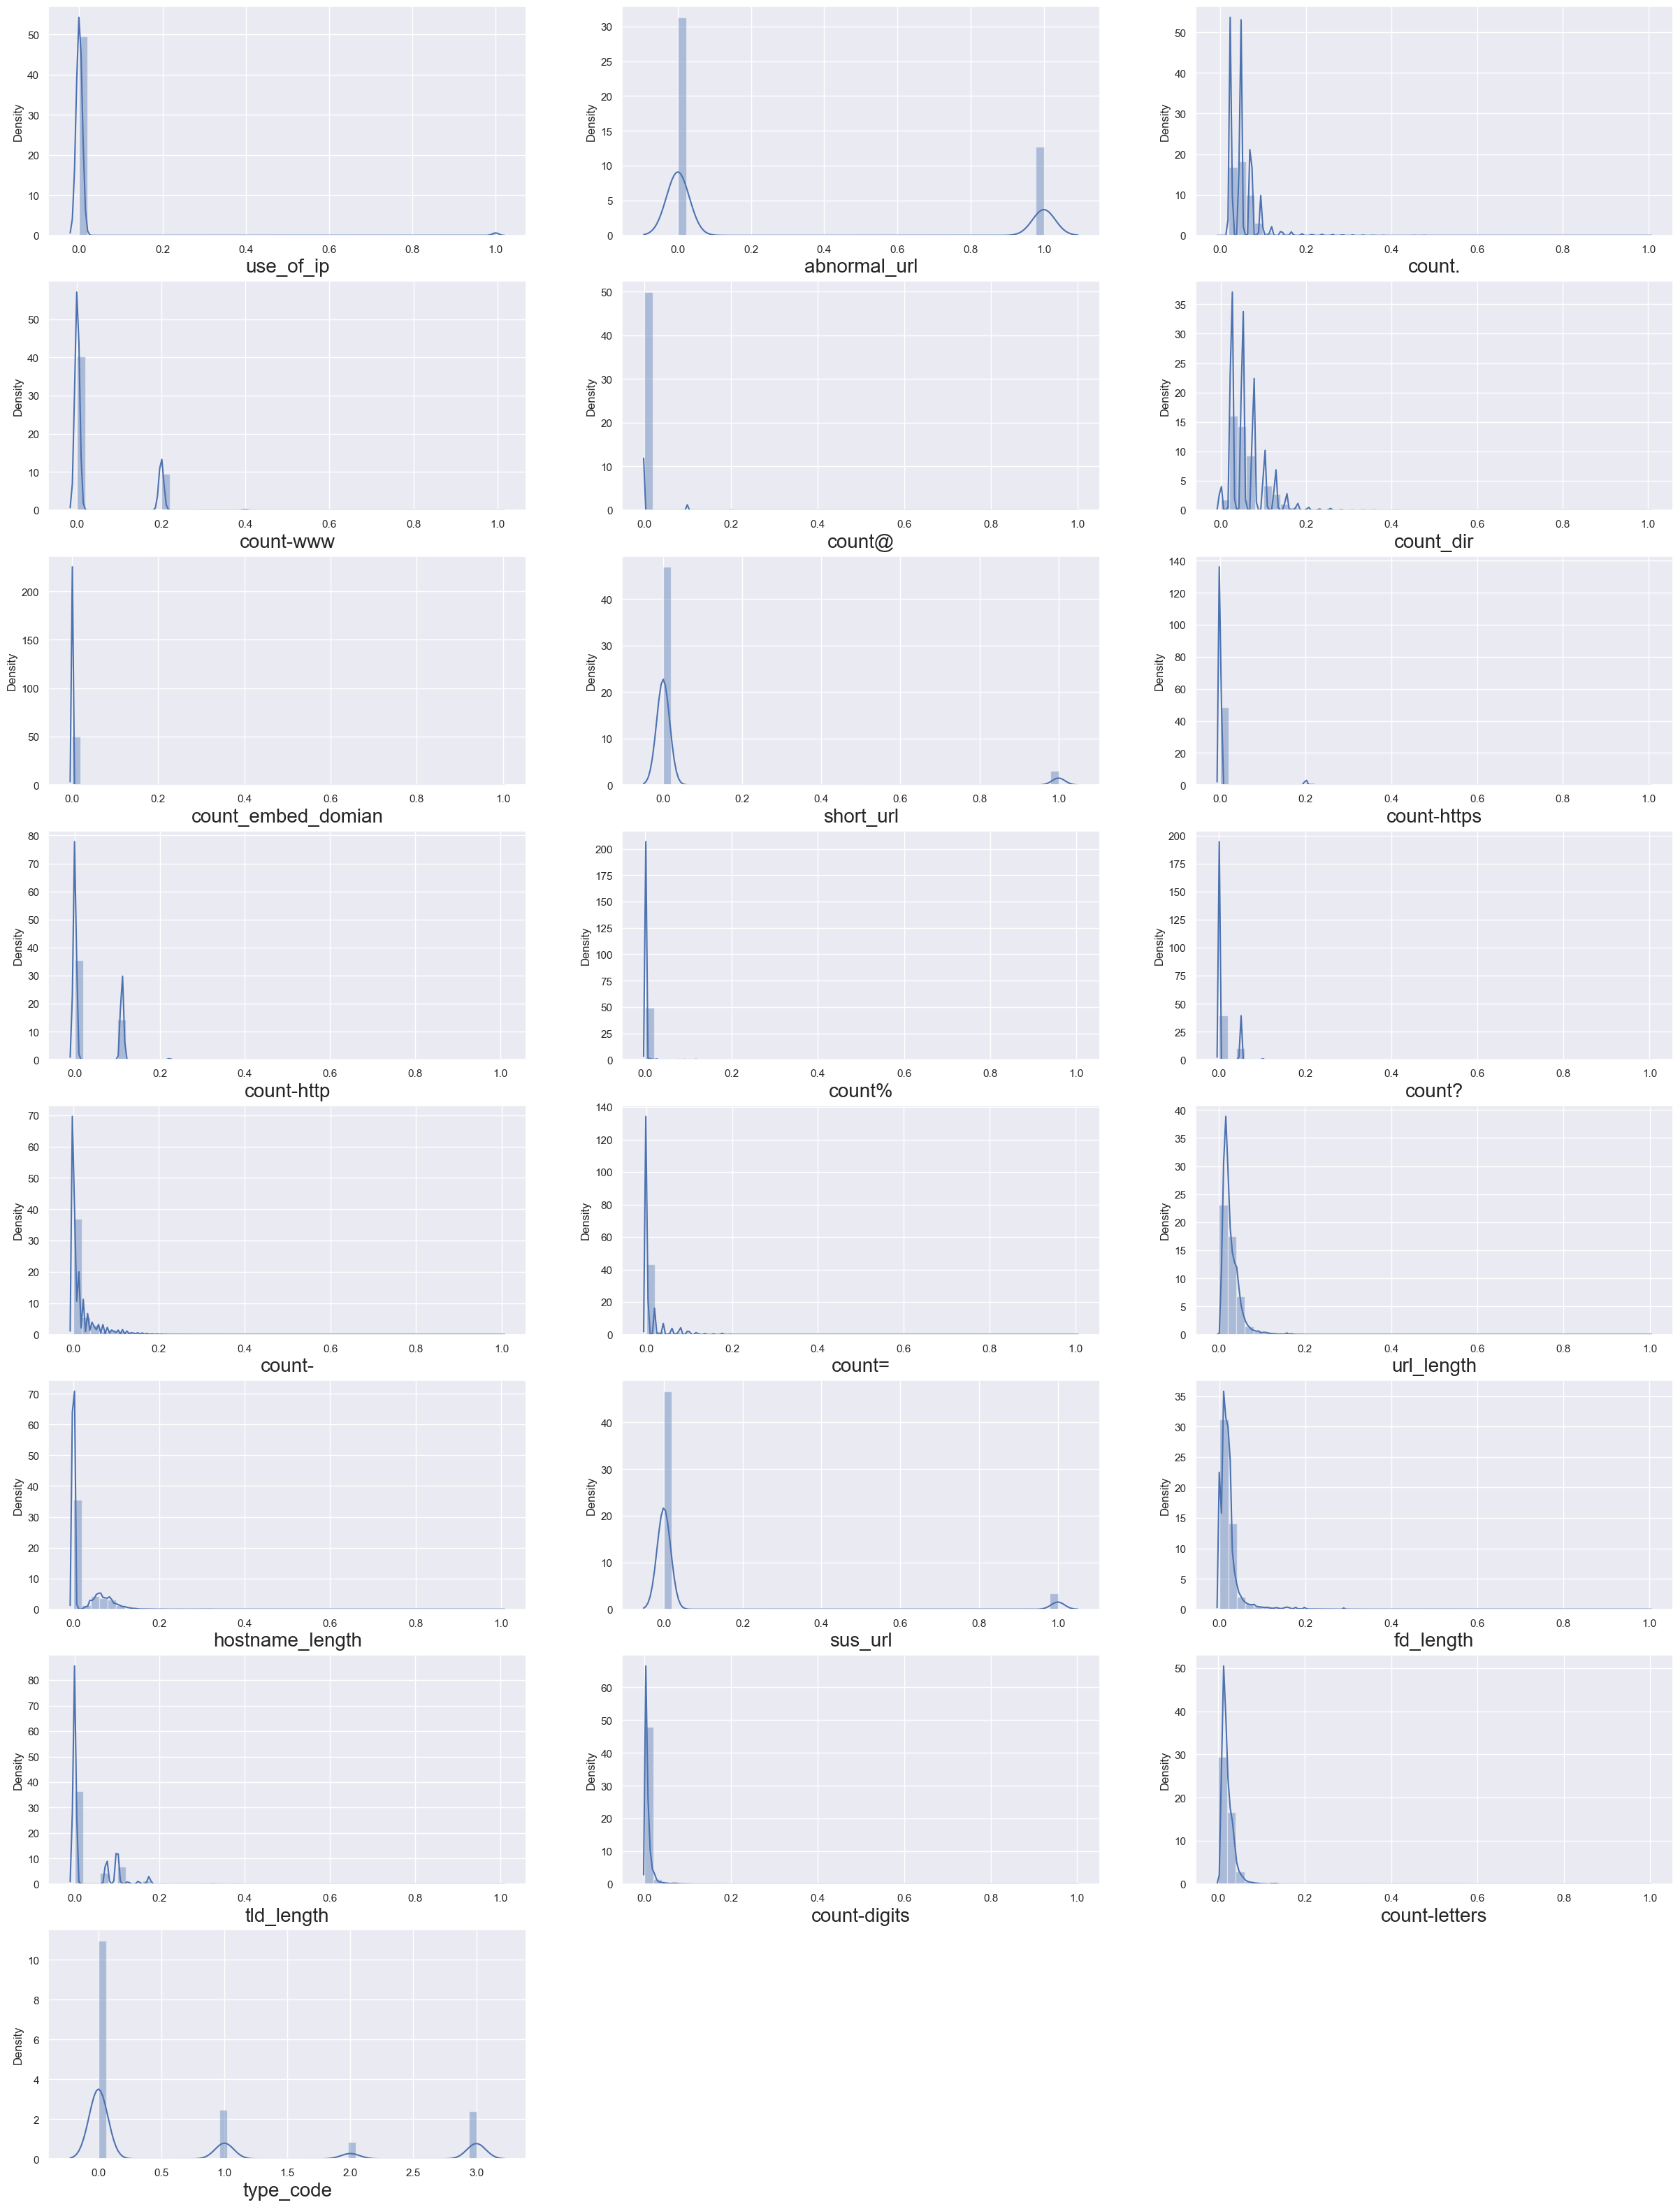

In [66]:
# Analysing the distribution of data.
plt.figure(figsize=(30,40),facecolor='white')
plotnumber = 1
sns.set()
for column in df:
    if plotnumber <= 22:
        ax = plt.subplot(8,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber += 1
plt.show()

# **<a id="section-9"></a><font color='3D87A6'> Correlation and heatmap </font>**

In [67]:
corr = df.corr().apply(lambda x: round(x,2))
z = corr.style.highlight_between(left=-1,right=-0.90,color='red').highlight_between(left=0.90,right=1,color='red')
z

,use_of_ip,abnormal_url,count.,count-www,count@,count_dir,count_embed_domian,short_url,count-https,count-http,count%,count?,count-,count=,url_length,hostname_length,sus_url,fd_length,tld_length,count-digits,count-letters,type_code
use_of_ip,1.000000,0.160000,0.110000,-0.050000,-0.000000,-0.040000,0.010000,-0.030000,-0.010000,0.160000,-0.010000,-0.050000,-0.050000,-0.040000,-0.050000,0.100000,-0.020000,-0.020000,-0.060000,0.060000,-0.100000,0.130000
abnormal_url,0.160000,1.000000,0.210000,0.350000,0.030000,0.030000,0.000000,-0.050000,0.240000,0.980000,0.150000,0.260000,0.160000,0.370000,0.380000,0.880000,-0.010000,0.120000,0.880000,0.170000,0.340000,0.330000
count.,0.110000,0.210000,1.000000,0.370000,0.040000,0.030000,0.020000,0.030000,0.040000,0.240000,-0.050000,0.270000,-0.080000,0.230000,0.380000,0.290000,0.330000,0.090000,0.190000,0.300000,0.350000,0.170000
count-www,-0.050000,0.350000,0.370000,1.000000,-0.000000,0.010000,0.020000,-0.040000,-0.040000,0.340000,-0.050000,0.230000,-0.070000,0.280000,0.160000,0.400000,0.080000,-0.000000,0.330000,-0.020000,0.190000,0.360000
count@,-0.000000,0.030000,0.040000,-0.000000,1.000000,0.030000,0.010000,0.010000,0.090000,0.030000,-0.000000,0.050000,0.010000,0.020000,0.050000,0.030000,0.020000,0.010000,0.050000,0.020000,0.050000,0.030000
count_dir,-0.040000,0.030000,0.030000,0.010000,0.030000,1.000000,0.080000,0.020000,0.030000,0.030000,0.030000,-0.150000,0.250000,-0.160000,0.300000,-0.010000,0.110000,-0.060000,0.050000,0.210000,0.290000,-0.130000
count_embed_domian,0.010000,0.000000,0.020000,0.020000,0.010000,0.080000,1.000000,0.000000,0.010000,0.010000,-0.000000,-0.010000,-0.010000,-0.010000,0.010000,0.010000,0.010000,-0.020000,0.000000,-0.000000,0.010000,-0.000000
short_url,-0.030000,-0.050000,0.030000,-0.040000,0.010000,0.020000,0.000000,1.000000,0.020000,-0.040000,-0.020000,-0.030000,0.050000,-0.030000,0.010000,-0.040000,-0.000000,-0.040000,-0.010000,-0.000000,0.020000,-0.020000
count-https,-0.010000,0.240000,0.040000,-0.040000,0.090000,0.030000,0.010000,0.020000,1.000000,0.270000,0.030000,0.020000,-0.000000,0.010000,0.090000,0.210000,0.040000,-0.020000,0.240000,0.090000,0.080000,0.210000
count-http,0.160000,0.980000,0.240000,0.340000,0.030000,0.030000,0.010000,-0.040000,0.270000,1.000000,0.190000,0.290000,0.150000,0.370000,0.400000,0.860000,0.020000,0.110000,0.860000,0.190000,0.360000,0.320000


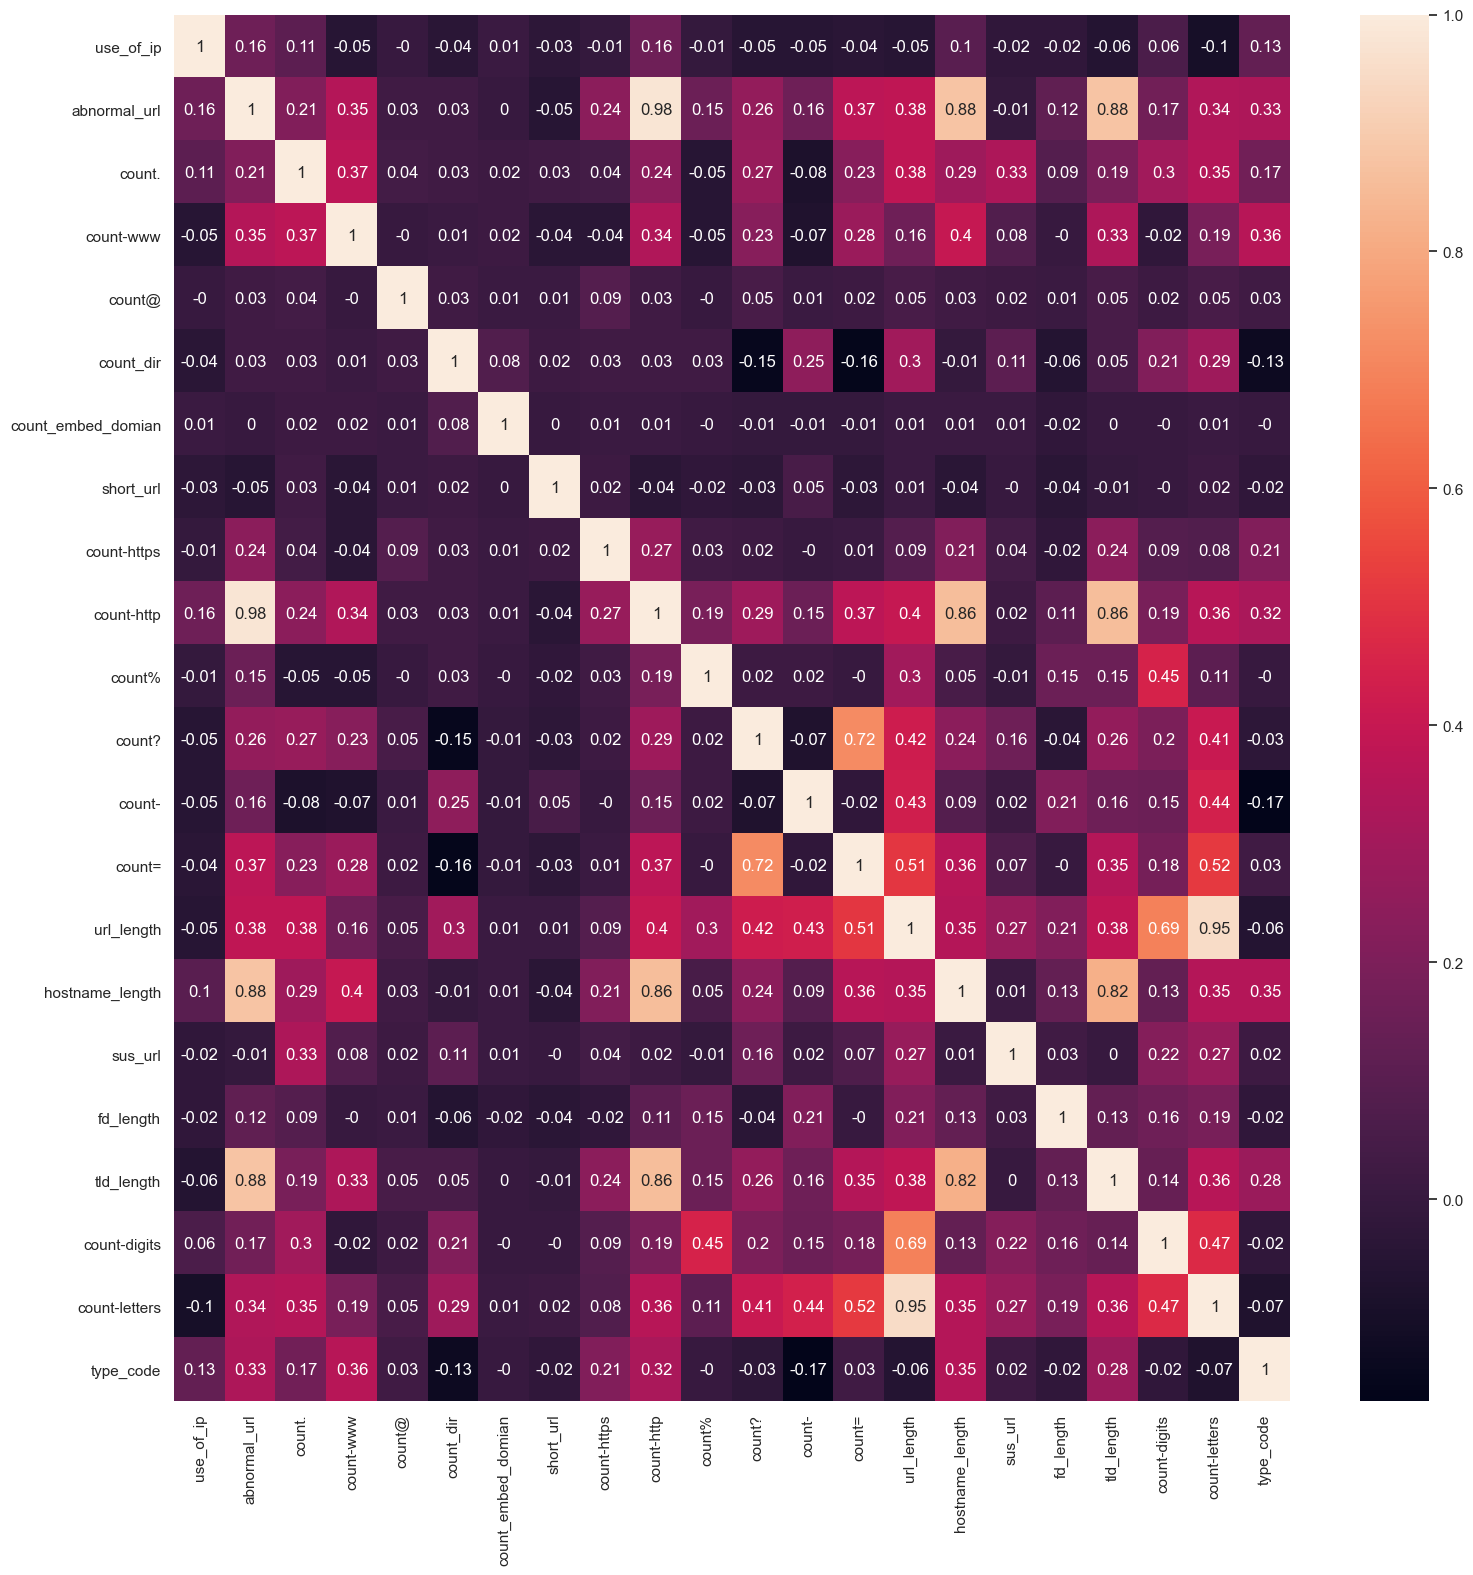

In [68]:
plt.figure(figsize=(18,18))
sns.heatmap(corr,annot = True)
plt.show()

# **<a id="section-10"></a><font color='3D87A6'> p_value and variance inflation factor </font>**
### checking 'P>|t|' > 0.05 and vif > 5

In [69]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
sm_data = sm.add_constant(x)

In [70]:
sm_model = sm.MNLogit(y,sm_data).fit()

         Current function value: 0.348706
         Iterations: 35


C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [71]:
sm_model.pvalues

,0,1,2
const,9.272129e-01,0.000000e+00,7.370294e-152
use_of_ip,9.594611e-01,4.484388e-32,3.060984e-16
abnormal_url,9.065773e-01,0.000000e+00,3.475961e-62
count.,1.071432e-20,0.000000e+00,2.018376e-121
count-www,0.000000e+00,0.000000e+00,0.000000e+00
count@,7.463945e-13,1.152723e-01,1.773031e-106
count_dir,0.000000e+00,1.754404e-27,0.000000e+00
count_embed_domian,9.778799e-01,1.564371e-16,1.100243e-40
short_url,5.816493e-95,2.035795e-08,4.579256e-05
count-https,8.955565e-01,0.000000e+00,0.000000e+00


#### creating the function to create dataframe to show vif and p_value at a time to comapare both wrt that feature(column)

def df_of_vif_pvalue():
    p_value_df = pd.DataFrame(sm_model.pvalues.apply(lambda sm_data: round(sm_data,6))).reset_indesm_data()
    p_value_df.columns=["feature_names",'p_value_1','p_value_2','p_value_3']
    def VIF(sm_data):
        vif_df = pd.DataFrame()
        vif_df["feature_names"] = sm_data.columns
        vif_df["vif"] = [variance_inflation_factor(sm_data.values,i) for i in range(sm_data.shape[1])]
        vif_df["vif"] = round(vif_df["vif"],2)
        vif_df = vif_df.sort_values(by = "vif",ascending = False)
        return vif_df
    global vif_pvalue_df
    vif_pvalue_df = pd.merge(p_value_df,VIF(sm_data), on = "feature_names")
    return vif_pvalue_df

## creating the function to check high vif and p_value both

def High_vif_pvalue(vif_pvalue_df):
    global lst_feature_to_del
    lst_feature_to_del = []
    '''vif_pvalue is a DataFrame having pvalues and vif'''
    for i in range(len(vif_pvalue_df)):
        if vif_pvalue_df["vif"][i] > 5 and vif_pvalue_df['p_value_1','p_value_2','p_value_3'][i] >0.05:
            lst_feature_to_del.append(vif_pvalue_df["feature_names"][i])
    return lst_feature_to_del

def High_vif_pvalue1(vif_pvalue_df):
    global lst_feature_to_del
    lst_feature_to_del = []
    '''vif_pvalue is a DataFrame having pvalues and vif'''
    for i in range(len(vif_pvalue_df)):
        if vif_pvalue_df["vif"][i] > 5 and vif_pvalue_df["p_values_1"][i] >0.05:
            lst_feature_to_del.append(vif_pvalue_df["feature_names"][i])
    return lst_feature_to_del

## checking the features whose vif and p_value both are high
High_vif_pvalue1(vif_pvalue_df1)

# **<a id="section-11"></a><font color='3D87A6'> Train Test Split </font>**


In [76]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2,shuffle=True, random_state=5)

In [77]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((520952, 21), (520952,), (130239, 21), (130239,))

# **<a id="section-12"></a><font color='3D87A6'> Data Balancing </font>**


In [78]:
y_train.value_counts()

0    342482
1     77165
3     75289
2     26016
Name: type_code, dtype: int64

In [79]:
from imblearn.over_sampling import SMOTE

In [80]:
smote = SMOTE(random_state=42)

# Fit the SMOTE object to the training data and oversample it
x_train_oversampled, y_train_oversampled = smote.fit_resample(x_train, y_train)

In [81]:
y_train_oversampled.value_counts()

1    342482
0    342482
2    342482
3    342482
Name: type_code, dtype: int64

# **<a id="section-13"></a><font color='3D87A6'> Model Building & Hyperparameter tuning </font>**

In [82]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [83]:
model_params = {
    "random_forest": {'model' : RandomForestClassifier(),
                      'params' : {'n_estimators' : [200,250,100,150]
                                 }
                     },
    'logistic_regression' : {
        'model' : LogisticRegression(solver='sag', multi_class='multinomial'),
        'params':{"C" : [1,5,10]}
    },
    "GradientBoostingClassifier":{"model": GradientBoostingClassifier(),
                                "params" : {'learning_rate':[0.2,0.3],'n_estimators':list(range(1,200,50)),'subsample':[1.0,2.0,3.0],'criterion':['friedman_mse']}
                                  },
    "KNN" : {"model" : KNeighborsClassifier(),
            "params" : {"n_neighbors":list(range(3,20,6)),'weights':['uniform'],'algorithm':['auto'],'leaf_size':list(range(10,60,15)),'p':[2,4,5,6],'metric':['minkowski']}
            }
    }

In [84]:
scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp["model"],mp['params'], cv =10, return_train_score = False)
    clf.fit(x, y)
    scores.append({
        "model" : model_name,
        'best_score': clf.best_score_,
        'best_params' : clf.best_params_})
mod_df = pd.DataFrame(scores,columns = ["model","best_score","best_params"])
mod_df

KeyboardInterrupt: 

In [ ]:
model_params = {
    'decision_tree': {'model': DecisionTreeClassifier(),
            'params' : {
                "criterion" :["gini", "entropy"],
                'splitter': [ 'best'],
                "min_samples_split": [2,4,6],
                'random_state': [36]}
           },
    "AdaBoostDT": {'model' : AdaBoostClassifier(),
                   'params' : {'n_estimators' : [10,50,100,150,200],
                               'learning_rate':[0.1,0.2,0.3,0.4],
                               "algorithm" : ['SAMME', 'SAMME.R']}
                     },
    'xgboost_classifier' : {'model' : XGBClassifier(objective='multi:softmax'),
        'params':{"n_estimators" : [1,30,100,150,200],
                 'learning_rate':[0.1,0.2,0.3,0.4],
                 }
                           }
}

In [ ]:
scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp["model"],mp['params'], cv =10, return_train_score = False)
    clf.fit(x, y)
    scores.append({
        "model" : model_name,
        'best_score': clf.best_score_,
        'best_params' : clf.best_params_})
mod_df1 = pd.DataFrame(scores,columns = ["model","best_score","best_params"])
mod_df1

In [ ]:
modeles_df = pd.concat([mod_df,mod_df1]).set_index('model',drop = True)
modeles_df

# **<a id="section-14"></a><font color='3D87A6'> ANN Model </font>**

In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Dropout

In [ ]:
pip install keras_tuner

In [ ]:
import keras_tuner as kt

In [ ]:
def build_model(hp):
  model=Sequential()
  counter=0
  for i in range(hp.Int("num_layers",min_value=1,max_value=10)):
    if counter==0:
      model.add(Dense(units=hp.Int("units"+str(i),min_value=8,max_value=128,step=8),activation=hp.Choice('Activation'+str(i),values=['relu','tanh','sigmoid']),input_dim=21))
      model.add(Dropout(hp.Choice("dropout"+str(i),values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]))) 
    else:
      model.add(Dense(units=hp.Int("units"+str(i),min_value=8,max_value=128,step=8),activation=hp.Choice('Activation'+str(i),values=['relu','tanh','sigmoid'])))
      model.add(Dropout(hp.Choice("dropout"+str(i),values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])))
    counter+=1
  model.add(Dense(4,activation='softmax'))
  optimizer=hp.Choice("optimizer",values=['adam','rmsprop','adadelta','sgd','nadam'])
  model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
  return model


In [ ]:
tuner=kt.RandomSearch(build_model,objective="val_accuracy",max_trials=3,directory="tuning",project_name="final1")

In [ ]:
tuner.search(x_train,y_train,epochs=5,validation_data=(x_test,y_test))

In [ ]:
tuner.get_best_hyperparameters()[0].values

In [ ]:
model=tuner.get_best_models(num_models=1)[0]

In [ ]:
model.summary()

In [ ]:
model.fit(x_train,y_train,epochs=20,initial_epoch=5,validation_data=(x_test,y_test))

In [ ]:
model.evaluate(x_test,y_test)

# **<a id="section-15"></a><font color='3D87A6'> Creating Best Model </font>**

In [ ]:
best_parameter_for_random_forest = modeles_df.loc["random_forest"]['best_params']
best_parameter_for_random_forest

In [72]:
rf_model = RandomForestClassifier(n_estimators=200)

In [73]:
rf_model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=200)

# **<a id="section-16"></a><font color='3D87A6'> Saving Model Using pickel & joblib </font>**

In [77]:
from joblib import dump
dump(rf_model, 'random_forest_model_complete.joblib')

['random_forest_model_complete.joblib']

In [ ]:
import pickle

In [ ]:
# create and save the pickle file
#with open('random_forest_model_complete.pkl', 'wb') as f:
#    pickle.dump(rf_model, f)

# **<a id="section-17"></a><font color='3D87A6'> confusion_matrix</font>**

In [ ]:
y_test_pred=rf_model.predict(x_test)
y_test_pred = pd.Series(y_test_pred)
y_test_pred

In [ ]:
accuracy_score(y_test,y_test_pred)

In [ ]:
cm = confusion_matrix(y_test,y_test_pred)
cm

In [ ]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [ ]:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n\n',

'Missclassifications = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n\n',

'Sensitivity/Recall or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n\n',

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n\n',

'Precision/Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

In [ ]:
print("accuracy of best model(random_forest) : ",accuracy_score(y_test,y_test_pred)*100,"%")

# **<a id="section-18"></a><font color='3D87A6'> ROC Curve</font>**

In [ ]:
y_pred_prob = rf_model.predict_proba(x_test)
y_pred_prob

In [ ]:
y_pred_prob = y_pred_prob[:,1]

In [ ]:
roc_auc_score_test = roc_auc_score(y_test,y_pred_prob)
roc_auc_score_test

In [ ]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)

In [ ]:
plt.plot(fpr,tpr,color= "orange",label = "ROC")
plt.plot([0,1],[0,1],color='blue',linestyle='--',label='ROC Curve test using svc(area = %0.4f)' % roc_auc_score_test)
plt.xlabel('False possitive rate')
plt.ylabel('True possitive rate')
plt.title('roc curve test using XGBClassifier')
plt.legend()
plt.show()

# **<a id="section-19"></a><font color='3D87A6'> Classification Report </font>**

In [ ]:
print(classification_report(y_test,y_test_pred))

# **<a id="section-20"></a><font color='3D87A6'> Prediction </font>**

In [ ]:
def main(url):
    
    status = []
    
    status.append(having_ip_address(url))
    status.append(abnormal_url(url))
    status.append(count_dot(url))
    status.append(count_www(url))
    status.append(count_atrate(url))
    status.append(no_of_dir(url))
    status.append(no_of_embed(url))
    
    status.append(shortening_service(url))
    status.append(count_https(url))
    status.append(count_http(url))
    
    status.append(count_per(url))
    status.append(count_ques(url))
    status.append(count_hyphen(url))
    status.append(count_equal(url))
    
    status.append(url_length(url))
    status.append(hostname_length(url))
    status.append(suspicious_words(url))
    status.append(digit_count(url))
    status.append(letter_count(url))
    status.append(fd_length(url))
    tld = get_tld(url,fail_silently=True)
      
    status.append(tld_length(tld))
    
    
    

    return status

In [ ]:

def get_prediction_from_url(test_url):
    features_test = main(test_url)
    # Due to updates to scikit-learn, we now need a 2D array as a parameter to the predict function.
    features_test = np.array(features_test).reshape((1, -1))

    

    pred = rf_model.predict(features_test)
    if int(pred[0]) == 0:
        
        res="SAFE"
        return res
    elif int(pred[0]) == 1.0:
        
        res="DEFACEMENT"
        return res
    elif int(pred[0]) == 2.0:
        res="PHISHING"
        return res
        
    elif int(pred[0]) == 3.0:
        
        res="MALWARE"
        return res
    

In [ ]:
urls = ['titaniumcorporate.co.za','en.wikipedia.org/wiki/North_Dakota',"http://adventure-nicaragua.net/index.php?option=com_mailto&tmpl=component&link=aHR0cDovL2FkdmVudHVyZS1uaWNhcmFndWEubmV0L2luZGV4LnBocD9vcHRpb249Y29tX2NvbnRlbnQmdmlldz1hcnRpY2xlJmlkPTQ3OmFib3V0JmNhdGlkPTM2OmRlbW8tYXJ0aWNsZXMmSXRlbWlkPTU0","yourbittorrent.com/?q=anthony-hamilton-soulife","http://www.szabadmunkaero.hu/cimoldal.html?start=12","http://www.szabadmunkaero.hu/cimoldal.html?start=12"]
for url in urls:
     print(get_prediction_from_url(url))
